<a href="https://colab.research.google.com/github/akhilajallavaram/Machine-Learning-Algorithms/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

In [2]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

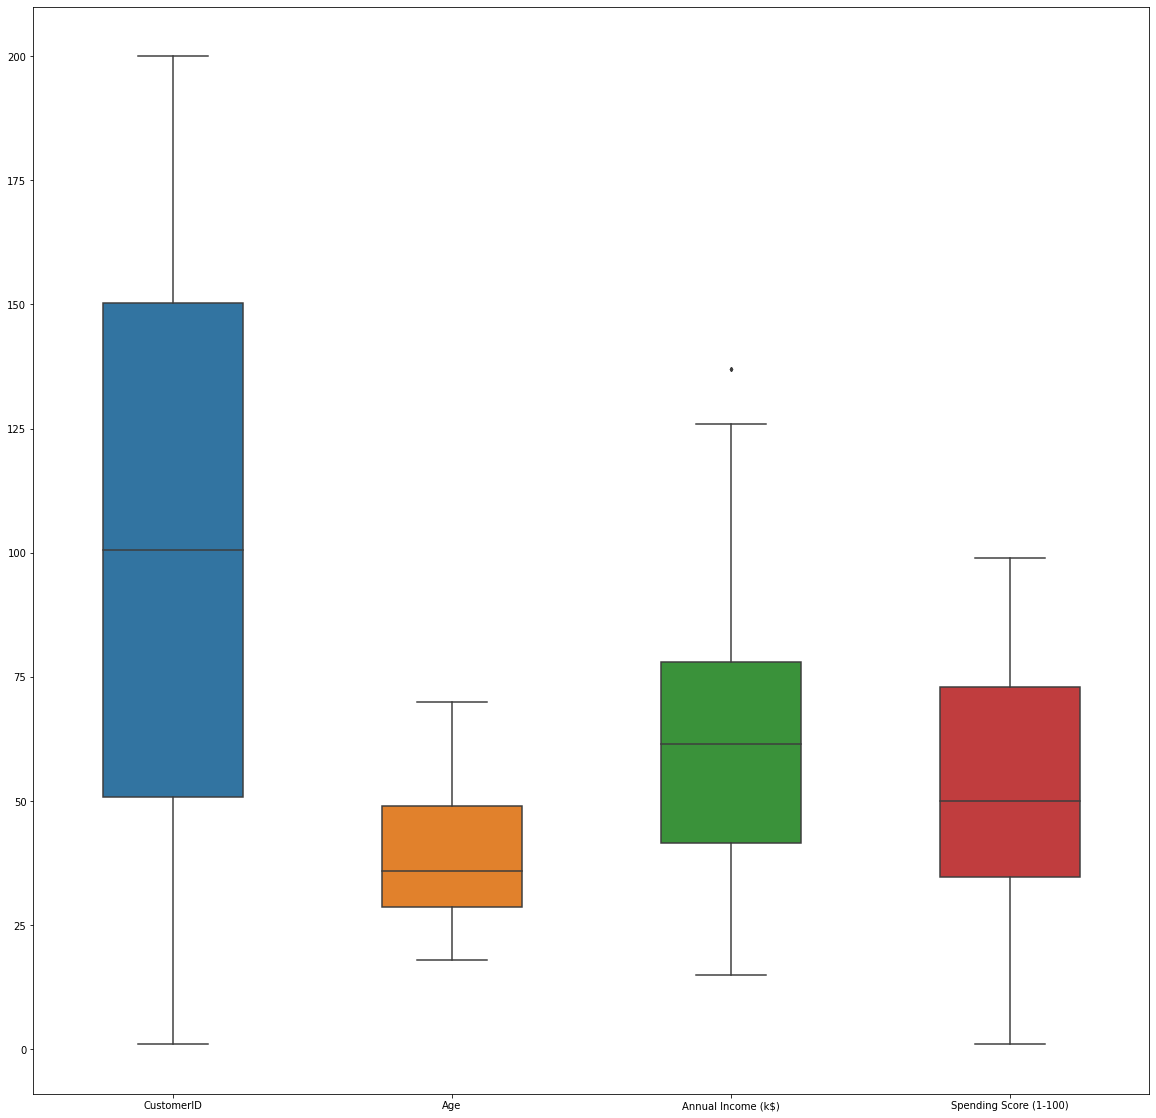

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [8]:
data=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [75]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(data)

In [76]:

X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# agglomerative clustering

In [11]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [21]:
from sklearn.cluster import AgglomerativeClustering
# Initialize and fit the agglomerative clustering model
model = AgglomerativeClustering(n_clusters=5)
model.fit(X)
agg_labels = model.labels_
agg_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(X,agg_labels)

0.5538089226688662

Silhouette score for ward linkage: 0.554
Silhouette score for complete linkage: 0.553
Silhouette score for average linkage: 0.479
Silhouette score for single linkage: 0.276


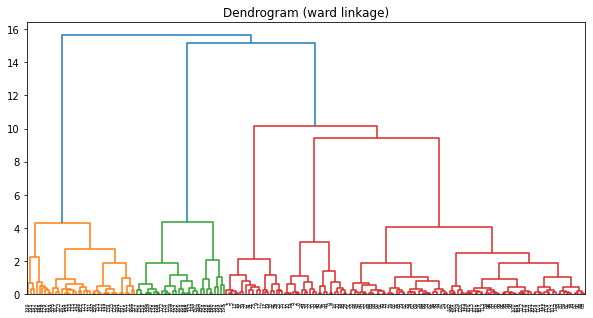

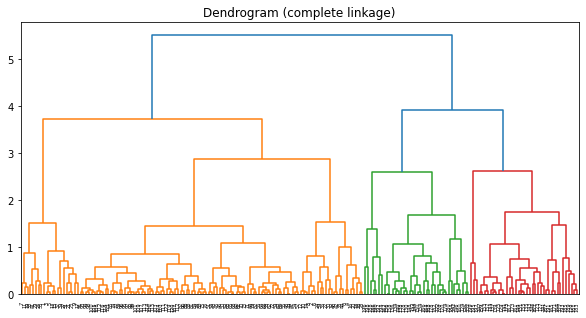

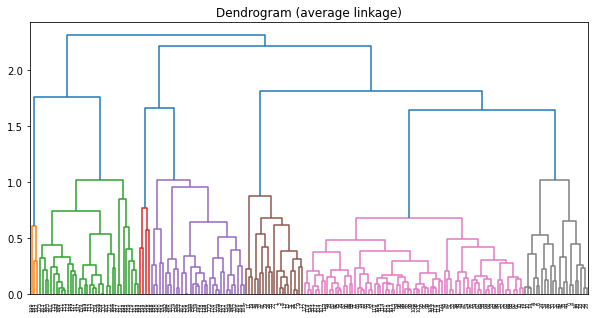

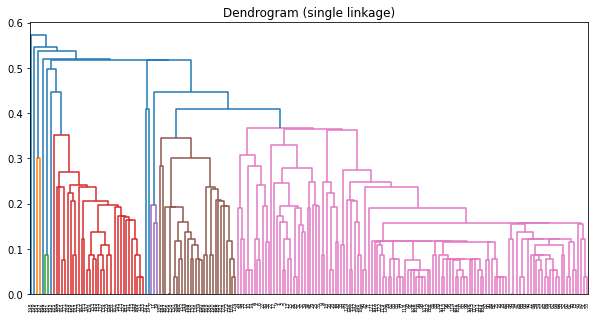

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# Define a list of linkage methods to compare
linkage_methods = ['ward', 'complete', 'average', 'single']

# Compute silhouette scores for each linkage method
for method in linkage_methods:
    # Create a hierarchical clustering model with the current linkage method
    clustering = AgglomerativeClustering(n_clusters=5, linkage=method)
    # Fit the model to the data
    clustering.fit(X)
    # Compute the silhouette score for the current clustering
    score = silhouette_score(X, clustering.labels_)
    print(f"Silhouette score for {method} linkage: {score:.3f}")
    
# Plot dendrograms for each linkage method
for method in linkage_methods:
    # Compute the linkage matrix for the current linkage method
    Z = linkage(X, method=method)
    # Plot the dendrogram for the current linkage method
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f"Dendrogram ({method} linkage)")
    plt.show()


<ipython-input-58-5c7a35f86424>:19: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrices[metric], method='ward')


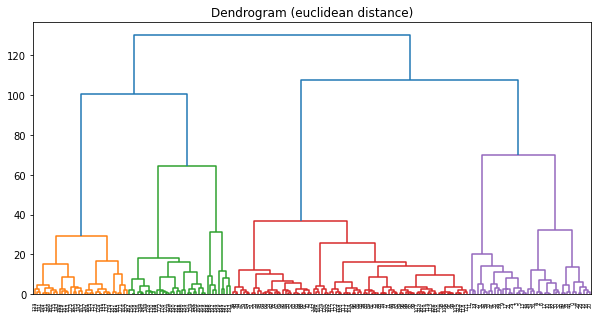

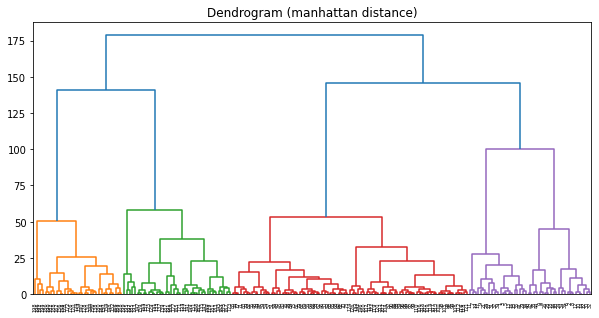

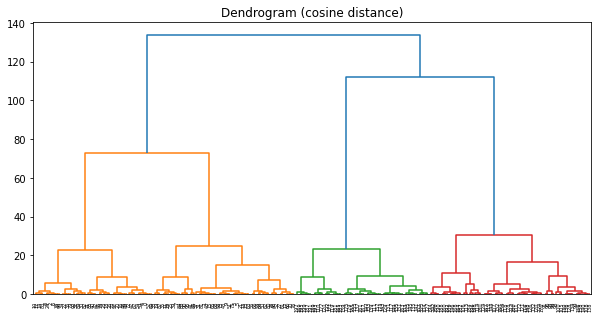

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import pairwise_distances

# Define a list of distance metrics to compare
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Compute pairwise distances for each distance metric
distance_matrices = {}
for metric in distance_metrics:
    distance_matrix = pairwise_distances(X, metric=metric)
    distance_matrices[metric] = distance_matrix
    
# Plot dendrograms for each distance metric
for metric in distance_metrics:
    # Compute the linkage matrix for the current distance metric
    Z = linkage(distance_matrices[metric], method='ward')
    # Plot the dendrogram for the current distance metric
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f"Dendrogram ({metric} distance)")
    plt.show()


In [105]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [106]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans_labels)

0.46658474419000145

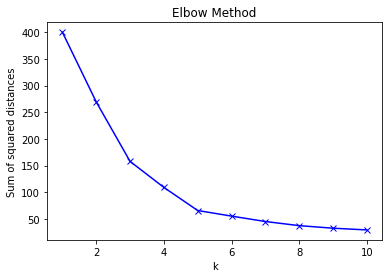

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = range(1, 11)

# Create an empty list to store the sum of squared distances for each k value
sum_of_squared_distances = []

# Fit the k-means model for each k value and calculate the sum of squared distances
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

In [110]:
# Set the number of clusters
k = 5

# Create a k-means object
kmeans = KMeans(n_clusters=k)

# Fit the k-means object to the data
kmeans.fit(X)

# Get the cluster labels
kmeans_labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Assign each data point to its nearest centroid
distances = kmeans.transform(X)
closest_cluster = np.argmin(distances, axis=1)

# Print the number of data points assigned to each cluster
for i in range(k):
    print("Cluster ", i, ": ", np.sum(closest_cluster == i))

Cluster  0 :  23
Cluster  1 :  81
Cluster  2 :  39
Cluster  3 :  35
Cluster  4 :  22


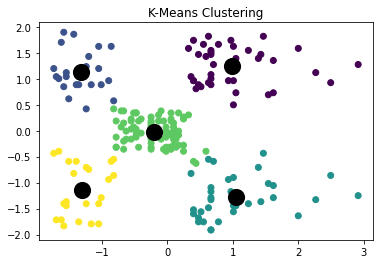

In [111]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# Plot the cluster centers with a black marker
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=200, linewidths=3, color='black', zorder=10)

# Set the plot title and axis labels
plt.title('K-Means Clustering')

# Show the plot
plt.show()

In [113]:
score = silhouette_score(X, kmeans_labels)

# Print the silhouette score
print('Silhouette Score:', score)

Silhouette Score: 0.5546571631111091


In [119]:
kmeans.predict([[20,80]])

array([2], dtype=int32)

# DB SCAN

Number of clusters:  2


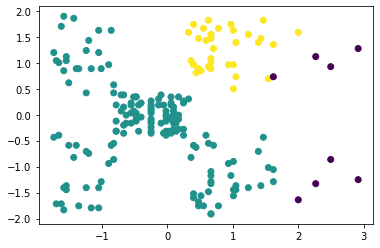

In [115]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Create a DBSCAN object with eps=0.5 and min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model on the data
dbscan.fit(X)

# Get the cluster labels
db_labels = dbscan.labels_

# Get the number of clusters
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print('Number of clusters: ', n_clusters)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=db_labels)
plt.show()


In [116]:
sil_score_db = silhouette_score(X, db_labels)

In [117]:
sil_score_db

0.35044619989666004